# MBA em Ciência de Dados
### Universidade de São Paulo, São Carlos, Brasil

**Disciplina:** Aprendizado de Máquina

**Professor Reponsavel:** Prof. Dr. André Carlos Ponce de Leon Ferreira de Carvalho
📧 andre@icmc.usp.br
🌐 [linkedin](https://www.linkedin.com/in/andr%C3%A9-carlos-ponce-de-leon-f-de-carvalho-151bb26/)
🔗 [site](http://www.cemeai.icmc.usp.br/component/teamdisplay/108)

# Prática: Predição de abandono de produto de crédito usando o algoritmo Support Vector Machine

**Autor:** Edesio Alcobaça
📧 edesio@usp.br
🌐 [linkedin](https://www.linkedin.com/in/ealcobaca/)
🔗 [site](https://ealcobaca.github.io/)

## Descrição & Objetivo

**Descrição dos Dados:** Uma empresa possui um produto de cartão de crédito muito conhecido no mercado. Contudo, dada a alta competitividade, a empresa percebeu que seus clientes começaram a abandonar seu produto. A empresa contratou você para modelar quais clientes provavelmente irão abandonar o produto, para que ela interfira proativamente evitando a perda dos clientes. Os dados disponibilizados possuem diversas características dos clientes (e.g., sexo, idade, estado civil, escolaridade) e do uso do produto de crédito (e.g., limite do cartão, tipo do cartão). A coluna `Attrition_Flag` indica se o cliente abandonou ou não o produto.

**Objetivo:** Modelar o problema com SVM para classificar quais clientes provavelmente irão abandonar o produto.

# 1. Leitura dos Dados


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [2]:
# Leitura de dados
data = pd.read_csv("credit_card_churn_data.csv")

target = 'Attrition_Flag'

categorical_features = ['Gender',  'Education_Level',
                        'Marital_Status', 'Income_Category', 'Card_Category'
                        ]

numerical_features = ['Dependent_count', 'Customer_Age',  'Months_on_book',
                      'Total_Relationship_Count', 'Months_Inactive_12_mon',
                      'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                      'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                      'Avg_Utilization_Ratio'
                      ]
data

,Dependent_count,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,3,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,Existing Customer
1,5,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,Existing Customer
2,3,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,Existing Customer
3,4,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,Existing Customer
4,3,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,Existing Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,2,50,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,Existing Customer
10123,2,41,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,Attrited Customer
10124,1,44,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,Attrited Customer
10125,2,30,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,Attrited Customer


# 2. Análise Exploratória dos Dados


In [3]:
# Número de exemplos e features
data.shape

(10127, 20)

In [4]:
# Contar classes
data[target].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [5]:
# Porcentagem de exemplos de cada classe
data[target].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [6]:
# Verificar se tem NaN
data.isna().sum()

Dependent_count             0
Customer_Age                0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender                      0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Attrition_Flag              0
dtype: int64

In [7]:
# Descrever dados categóricos
data.describe(include=[object])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
count,10127,10127,10127,10127,10127,10127
unique,2,7,4,6,4,2
top,F,Graduate,Married,Less than $40K,Blue,Existing Customer
freq,5358,3128,4687,3561,9436,8500


In [8]:
# Descrever dados numéricos
data.describe(include=[np.number])


,Dependent_count,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,2.346203,46.325960,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,1.298908,8.016814,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,2.000000,46.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,3.000000,52.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,5.000000,73.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# 3. Modelagem & Avaliação

## 3.1 Baseline

In [9]:
# Separar os dados em treinamento e teste

X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [10]:
# Transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# zscore para mudar escala os dados
scaler = StandardScaler()

# modelo baseline
lrc = LogisticRegression(random_state=42)

# pipeline de machine learning
pipeb = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', lrc)
])

# cross validação da solução
cv_list_lr_baseline = cross_val_score(
    pipeb,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

In [11]:
mean_cv_lr_baseline = np.mean(cv_list_lr_baseline)
std_cv_lr_baseline = np.std(cv_list_lr_baseline)

print(f"Performance (bac): {round(mean_cv_lr_baseline, 4)} +- {round(std_cv_lr_baseline, 4)}")

Performance (bac): 0.7834 +- 0.0227


# 3.2 Modelando com SVM

In [12]:
n_samples = 1500
X_, Y_ = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

Y_ = ["c1" if i == 0 else "c2" for i in Y_]

aux_data = pd.DataFrame({"x": X_[:, 0], "y": X_[:, 1], "color": Y_})

fig = px.scatter(aux_data, x="x", y="y", color="color", opacity=0.5)
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

Mapeando os dados em uma função polinomial de segundo grau:

$
k(x, y) = 
\begin{pmatrix}
 x^2\\ 
 \sqrt{2}xy\\
 y^2\\
\end{pmatrix}
$

In [13]:
def k(x, y):
  return x**2, np.sqrt(2)*x*y, y**2

x, y, z = k(X_[:,0], X_[:, 1])
aux_data = pd.DataFrame({"x": x, "y": y, "z": z, "color": Y_})

fig = px.scatter_3d(aux_data, x="x", y="y", z="z", color="color", opacity=0.5)
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

### Kernel Linear

O kernel linear é definido no sklearn como: 

$\left \langle x, x' \right \rangle$

In [14]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# minmax para mudar escala os dados
scaler = MinMaxScaler()

# modelo SVM
svc = SVC(
    C=1.0, # C é o hiperparâmetro de regularização.
           # Ele controla o trade-off entre o limite de decisão suave e a
           # classificação correta dos pontos de treinamento.
           # O aumento dos valores de C pode levar a um ajuste excessivo dos dados de treinamento.
    kernel="linear", # tipo do kernel
    class_weight="balanced", # atribuir o mesmo peso para as duas classes
    max_iter=100000, # número de iterações do otimizador
    random_state=42
    )

# pipeline de machine learning
pipe1 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', svc)
])

# cross validação da solução
cv_list_pipe1_baseline = cross_val_score(
    pipe1,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe1_baseline = np.mean(cv_list_pipe1_baseline)
std_cv_pipe1_baseline = np.std(cv_list_pipe1_baseline)

print(f"Performance (bac): {round(mean_cv_pipe1_baseline, 4)} +- {round(std_cv_pipe1_baseline, 4)}")

Performance (bac): 0.855 +- 0.0119


### Kernel Polinomial

O kernel polinomial é definido no sklearn como:

 $\left ( \gamma \left \langle x, x' \right \rangle + r \right )^d$

 onde, $d$ é especificado pelo hyperparametro `degree`, $r$ por `coef0` e $\gamma$ por `gamma`.

In [15]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# minmax para mudar escala os dados
scaler = MinMaxScaler()

# modelo SVM
svc = SVC(
    C=1.0, # C é o hiperparâmetro de regularização.
           # Ele controla o trade-off entre o limite de decisão suave e a
           # classificação correta dos pontos de treinamento.
           # O aumento dos valores de C pode levar a um ajuste excessivo dos dados de treinamento.
    kernel="poly", # tipo do kernel
    degree=3, # grau do kernel polinomial
    coef0=1, # termo independente da função kernel
    gamma="scale", # coeficiente gamma da função kernel
                   # scale =  1 / (n_features * X.var())
                   # auto = 1 / n_features
                   # podemos usar float > 0
    class_weight="balanced", # atribuir o mesmo peso para as duas classes
    max_iter=100000, # número de iterações do otimizador
    random_state=42
    )

# pipeline de machine learning
pipe2 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', svc)
])

# cross validação da solução
cv_list_pipe2_baseline = cross_val_score(
    pipe2,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe2_baseline = np.mean(cv_list_pipe2_baseline)
std_cv_pipe2_baseline = np.std(cv_list_pipe2_baseline)

print(f"Performance (bac): {round(mean_cv_pipe2_baseline, 4)} +- {round(std_cv_pipe2_baseline, 4)}")

Performance (bac): 0.8692 +- 0.0162


### Kernel RBF

O kernel rbf é definido no sklearn como: 

$exp(-\gamma \left \| x - x' \right\|^2)$

 onde, $\gamma$ é especificado pelo hyperparametro `gamma` e deve ser $\geq 0$.

In [16]:
# transformar features categóricas via one-hot-encoding
ct = ColumnTransformer( 
    transformers=[
        ("ohe", OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'
)

# minmax para mudar escala os dados
scaler = MinMaxScaler()

# modelo SVM
svc = SVC(
    C=1.0, # C é o hiperparâmetro de regularização.
           # Ele controla o trade-off entre o limite de decisão suave e a
           # classificação correta dos pontos de treinamento.
           # O aumento dos valores de C pode levar a um ajuste excessivo dos dados de treinamento.
    kernel="rbf", # tipo do kernel
    gamma="scale", # coeficiente gamma da função kernel
                   # scale = 1 / (n_features * X.var())
                   # auto = 1 / n_features
                   # podemos usar float > 0
    class_weight="balanced", # atribuir o mesmo peso para as duas classes
    max_iter=100000, # número de iterações do otimizador
    random_state=42
    )

# pipeline de machine learning
pipe3 = Pipeline([
    ('column-transformer', ct),
    ('scaler', scaler),
    ('model', svc)
])

# cross validação da solução
cv_list_pipe3_baseline = cross_val_score(
    pipe3,
    X_train,
    y_train,
    cv=10,
    scoring="balanced_accuracy"
)

mean_cv_pipe3_baseline = np.mean(cv_list_pipe3_baseline)
std_cv_pipe3_baseline = np.std(cv_list_pipe3_baseline)

print(f"Performance (bac): {round(mean_cv_pipe3_baseline, 4)} +- {round(std_cv_pipe3_baseline, 4)}")

Performance (bac): 0.857 +- 0.0176


# Avaliação Experimental


In [17]:
# resultados da cross-validação

df_result_cv = pd.DataFrame(
    [cv_list_lr_baseline, cv_list_pipe1_baseline, cv_list_pipe2_baseline, cv_list_pipe3_baseline],
    index=["baseline","SVM-linear", "SVM-poly", "SMV-rbf"]
).T

df_result_cv

,baseline,SVM-linear,SVM-poly,SMV-rbf
0,0.761374,0.846160,0.842349,0.824149
1,0.765576,0.847759,0.867743,0.861861
2,0.768097,0.881166,0.889017,0.884159
3,0.777053,0.856347,0.881925,0.866431
4,0.777053,0.854666,0.861020,0.839275
5,0.782279,0.855587,0.862045,0.859052
6,0.836776,0.867168,0.891722,0.862413
7,0.777893,0.860077,0.864934,0.869505
8,0.815479,0.839403,0.847289,0.834308
9,0.772090,0.841585,0.884272,0.868476


In [18]:
# linearizar matriz
df_res = df_result_cv.stack().to_frame("balanced_accuracy")
df_res.index.rename(["fold", "pipelines"], inplace=True)
df_res = df_res.reset_index()
df_res.head(12)

,fold,pipelines,balanced_accuracy
0,0,baseline,0.761374
1,0,SVM-linear,0.846160
2,0,SVM-poly,0.842349
3,0,SMV-rbf,0.824149
4,1,baseline,0.765576
5,1,SVM-linear,0.847759
6,1,SVM-poly,0.867743
7,1,SMV-rbf,0.861861
8,2,baseline,0.768097
9,2,SVM-linear,0.881166


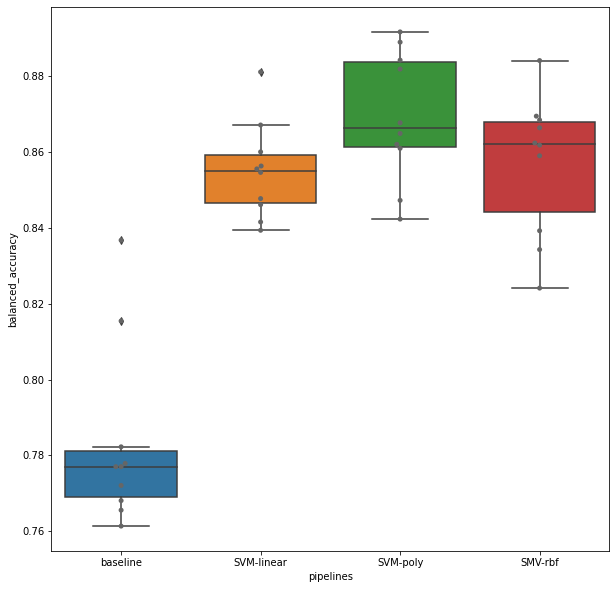

In [19]:
plt.figure(figsize=(10,10))

ax = sns.boxplot(x="pipelines", y="balanced_accuracy", data=df_res)
ax = sns.swarmplot(x="pipelines", y="balanced_accuracy", data=df_res, color=".40")

In [20]:
# retreinar o pipeline selecionado com todos os dados de treinamento

pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
bac = balanced_accuracy_score(y_test, y_pred) 

print("Performance: ", round(bac, 4))


Performance:  0.8633


## Referências & Links



1. [Suppot Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
2. [Credit Card Customer Data](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)
3. [The Kernel Trick in Support Vector Classification](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f)
4. [Understanding Support Vector Machine(SVM) algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)


<font size="1"> © <a href="https://github.com/ealcobaca">ealcobaca</a> *(2022)* </font>